# Day 5: Alchemical Reduction 
You've managed to sneak in to the prototype suit manufacturing lab. The Elves are making decent progress, but are still struggling with the suit's size reduction capabilities.

While the very latest in 1518 alchemical technology might have solved their problem eventually, you can do better. You scan the chemical composition of the suit's material and discover that it is formed by extremely long [polymers](https://en.wikipedia.org/wiki/Polymer) (one of which is available as your puzzle input).

The polymer is formed by smaller **units** which, when triggered, react with each other such that two adjacent units of the same type and opposite polarity are destroyed. Units' types are represented by letters; units' polarity is represented by capitalization. For instance, r and R are units with the same type but opposite polarity, whereas r and s are entirely different types and do not react.

For example:

- In aA, a and A react, leaving nothing behind.
- In abBA, bB destroys itself, leaving aA. As above, this then destroys itself, leaving nothing.
- In abAB, no two adjacent units are of the same type, and so nothing happens.
- In aabAAB, even though aa and AA are of the same type, their polarities match, and so nothing happens.

Now, consider a larger example, ̀ dabAcCaCBAcCcaDA`:

```
dabAcCaCBAcCcaDA  The first 'cC' is removed.
dabAaCBAcCcaDA    This creates 'Aa', which is removed.
dabCBAcCcaDA      Either 'cC' or 'Cc' are removed (the result is the same).
dabCBAcaDA        No further actions can be taken.
```
After all possible reactions, the resulting polymer contains 10 units.

**How many units remain after fully reacting the polymer you scanned?** 

(Note: in this puzzle and others, the input is large; if you copy/paste your input, make sure you get the whole thing.)

In [1]:
with open("day5.txt") as f:
    content = f.readlines()
content = content[0].strip()
content

'kLltgGTKFjdDpPkKcCJjJhHfmMAjJasSFfHEesYMmTtrRBjJmcCMbDdmMyOoUuGLrRlJeEMmxtTXjKzRroOmpjJqVvQPMZAXoOxeEZtTzLYyqQnNlMmafFLlRrkEeNkKtTngGlOoLXxtTLDdBblRCcqQrFfLQAaqeEZMgGbBOoFfyTtIizZuUsSYmbzTiItQqOouUGgZBCcsSHhxXIrOoRizlUuZjJefFCcEgGMmMmRrXlLyYcCxvVCcyYcCZhHzyYWwcXxlLCeECcOCcozHnYyNftTJjFSsrRTtqQSFfFfYxXysSsrMKkmeeEEdDRHhNCcgGnQqiIqQLlkKbPpBQOlDdLoqhjJtzZfFiIVvTMJjSgGsmyGPpgUhHuoIzZiOYkKPpUuqBbQcHhCTiZrRLJEkKuUejlTNiInNntdDxXzAauUOLkKloIdDzuUjJvpPViIbBiOGgoIJnNFfYyjbBZWwSsdDsSUuBUCnXxNgGcKJjkCcuUWwiIcCCcDdsSDUumMdSSuUPpyaUuqmMQAYkFfnNKMmsCgGVvyYJjcnNlLVeEvEesQqvVEMmeWMmwBbyvVYUuavJjVTtAJCczcCZgGcYyCjJEejuupPUStTsPphHgGafFAvVGgzWwAafiIygGUupsSPYfFFLlzrRZFaeEAWjJTXWwxFftcCjJfFkYyKwuUJKkfFBbMnNmIPlLZyYzzZpijnlLwWNLlfGUuTtglHFvVfHhhYywbBvVVLlsSvKeEoOkZzYyZzWGxXgzZBUgGaAvVuCwWNncjJbDdQqGgAatTFAaftLsLNnuJjUlfFSPpmMfFFflmlLMThFfXxHUuEcCrRXxezZrnNRsSWwWwZUuzFfTtiIaAvaOoAVGPpRdDrgWdDtSsGgaAfFopPhHVvOksBbSKOntTLlNjJKkhHGEeGgjtTaMyYmPpAJuUHhZGgzvVDdmMNnFCcfgzZgxXRHhrGzZOovVcLlCUuoCDdchHOuUsSvVNAano

In [2]:
destroyers = ['aA','bB','cC','dD','eE','fF','gG','hH','iI','jJ','kK','lL','mM','nN','oO','pP','qQ','rR','sS','tT','uU','vV','wW','xX','yY','zZ']
for q in range(len(destroyers)):
    destroyers.append(destroyers[q][::-1])

In [3]:
data = content
while True:
    x = 0
    cdata = data
    for q in destroyers:
        data = data.replace(q, '')
        if data == cdata:
            x +=1
    if x == len(destroyers):
        break
        print("Done")

In [4]:
len(data)

11042

## Part Two
Time to improve the polymer.

One of the unit types is causing problems; it's preventing the polymer from collapsing as much as it should. Your goal is to figure out which unit type is causing the most problems, remove all instances of it (regardless of polarity), fully react the remaining polymer, and measure its length.

For example, again using the polymer dabAcCaCBAcCcaDA from above:

- Removing all A/a units produces dbcCCBcCcD. Fully reacting this polymer produces dbCBcD, which has length 6.
- Removing all B/b units produces daAcCaCAcCcaDA. Fully reacting this polymer produces daCAcaDA, which has length 8.
- Removing all C/c units produces dabAaBAaDA. Fully reacting this polymer produces daDA, which has length 4.
- Removing all D/d units produces abAcCaCBAcCcaA. Fully reacting this polymer produces abCBAc, which has length 6.

In this example, removing all C/c units was best, producing the answer 4.

What is the length of the shortest polymer you can produce by removing all units of exactly one type and fully reacting the result?

In [5]:
num_out = {}
for b in range(26):
    data = content
    for alpha in destroyers[b]:
        data = data.replace(alpha, '')
    while True:
        x = 0
        cdata = data
        for q in destroyers:
            data = data.replace(q, '')
            if data == cdata:
                x +=1
        if x == len(destroyers):
            break
            print("Done")
    num_out[destroyers[b]]=len(data)

{'aA': 10652, 'bB': 6872, 'cC': 10634, 'dD': 10636, 'eE': 10602, 'fF': 10542, 'gG': 10556, 'hH': 10622, 'iI': 10572, 'jJ': 10584, 'kK': 10576, 'lL': 10578, 'mM': 10616, 'nN': 10560, 'oO': 10678, 'pP': 10572, 'qQ': 10610, 'rR': 10580, 'sS': 10554, 'tT': 10614, 'uU': 10592, 'vV': 10594, 'wW': 10606, 'xX': 10634, 'yY': 10638, 'zZ': 10570}


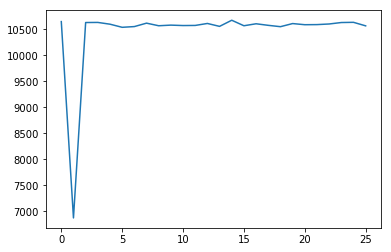

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(num_out.values()))
print(num_out)